## Gradient Descent (batch)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import seaborn as sns

<Axes: >

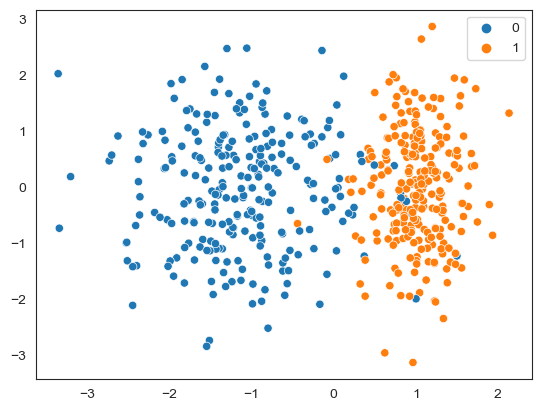

In [2]:
X, t = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=14)

t = t[:,np.newaxis]

sns.set_style('white')
sns.scatterplot(x=X[:,0],y=X[:,1],hue=t.reshape(-1))

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [4]:
def compute_cost(X, t, w):
    N = len(t)
    h = sigmoid(X @ w)
    epsilon = 1e-5
    cost = (1/N)*(((-t).T @ np.log(h + epsilon))-((1-t).T @ np.log(1-h + epsilon)))
    return cost

In [5]:
def gradient_descent(X, t, w, learning_rate, iterations):
    N = len(t)
    cost_history = np.zeros((iterations,1))

    for i in range(iterations):
        w = w - (learning_rate/N) * (X.T @ (sigmoid(X @ w) - t))
        cost_history[i] = compute_cost(X, t, w)

    return (cost_history, w)

In [6]:
def predict(X, w):
    # 0.5 threshold
    return np.round(sigmoid(X @ w))

In [7]:
len(X)

500

Initial Cost is: [[0.69312718]] 

Optimal Parameters are: 
 [[-0.07024012]
 [ 1.9275589 ]
 [ 0.02285894]] 



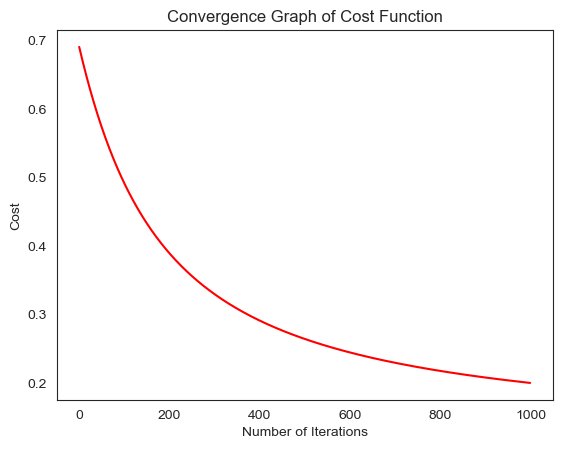

In [8]:
N = len(t)

# 1이 반복되는 열 추가, dummy input을 위해
X = np.hstack((np.ones((N,1)),X))
# 차원수
M = np.size(X,1)
# 파라미터 초기화
w = np.zeros((M,1))

iterations = 1000
learning_rate = 0.01

initial_cost = compute_cost(X, t, w)

print("Initial Cost is: {} \n".format(initial_cost))

(cost_history, w_optimal) = gradient_descent(X, t, w, learning_rate, iterations)

print("Optimal Parameters are: \n", w_optimal, "\n")

plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [9]:
## Accuracy

y_pred = predict(X, w_optimal)
score = float(sum(y_pred == t))/ float(len(t))

print(score)

0.954


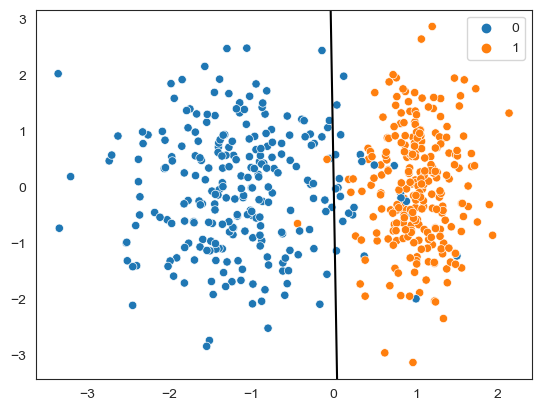

In [10]:
slope = -(w_optimal[1] / w_optimal[2])
intercept = -(w[0] / w_optimal[2])

sns.set_style('white')
sns.scatterplot(x=X[:,1],y=X[:,2],hue=t.reshape(-1))

ax = plt.gca()
ax.autoscale(False)
x_vals = np.array(ax.get_xlim())
y_vals = intercept + (slope * x_vals)
plt.plot(x_vals, y_vals, c="k");

## Stochastic Gradient Descent

In [11]:
def sgd(X, t, w, learning_rate, iterations):
    N = len(t)
    cost_history = np.zeros((iterations,1))

    for i in range(iterations):
        i = i % N
        w = w - learning_rate * (X[i, np.newaxis].T * (sigmoid(X[i] @ w) - t[i]))
        cost_history[i] = compute_cost(X[i], t[i], w)

    return (cost_history, w)

Initial Cost is: [[0.69312718]] 

Optimal Parameters are: 
 [[-0.19304782]
 [ 2.5431236 ]
 [ 0.01130098]] 



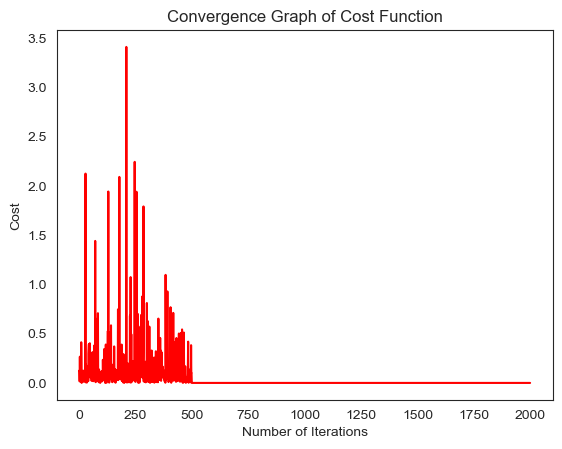

In [12]:
X, t = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=14)

t = t[:,np.newaxis]

N = len(t)

X = np.hstack((np.ones((N,1)),X))
M = np.size(X,1)
w = np.zeros((M,1))

iterations = 2000
learning_rate = 0.01

initial_cost = compute_cost(X, t, w)

print("Initial Cost is: {} \n".format(initial_cost))

(cost_history, w_optimal) = sgd(X, t, w, learning_rate, iterations)

print("Optimal Parameters are: \n", w_optimal, "\n")

plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [13]:
## Accuracy

y_pred = predict(X, w_optimal)
score = float(sum(y_pred == t))/ float(len(t))

print(score)

0.96


## Mini-batch Gradient Descent

In [14]:
def batch_gd(X, t, w, learning_rate, iterations, batch_size):
    N = len(t)
    cost_history = np.zeros((iterations,1))
    shuffled_indices = np.random.permutation(N)
    X_shuffled = X[shuffled_indices]
    t_shuffled = t[shuffled_indices]

    for i in range(iterations):
        i = i % N
        X_batch = X_shuffled[i:i+batch_size]
        t_batch = t_shuffled[i:i+batch_size]
        # batch가 epoch 경계를 넘어가는 경우, 앞 부분으로 채워줌
        if X_batch.shape[0] < batch_size:
            X_batch = np.vstack((X_batch, X_shuffled[:(batch_size - X_batch.shape[0])]))
            t_batch = np.vstack((t_batch, t_shuffled[:(batch_size - t_batch.shape[0])]))
        w = w - (learning_rate/batch_size) * (X_batch.T @ (sigmoid(X_batch @ w) - t_batch))
        cost_history[i] = compute_cost(X_batch, t_batch, w)

    return (cost_history, w)

Initial Cost is: [[0.69312718]] 

Optimal Parameters are: 
 [[-0.06636599]
 [ 1.93326402]
 [ 0.02813731]] 



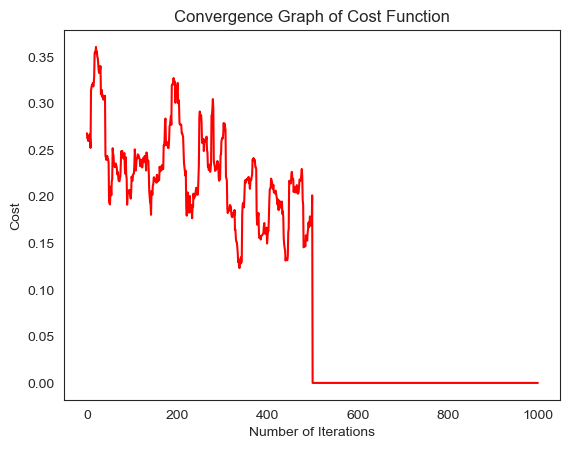

In [15]:
X, t = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=14)

t = t[:,np.newaxis]

N = len(t)

X = np.hstack((np.ones((N,1)),X))
M = np.size(X,1)
w = np.zeros((M,1))

iterations = 1000
learning_rate = 0.01

initial_cost = compute_cost(X, t, w)

print("Initial Cost is: {} \n".format(initial_cost))

(cost_history, w_optimal) = batch_gd(X, t, w, learning_rate, iterations, 32)

print("Optimal Parameters are: \n", w_optimal, "\n")

plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [16]:
## Accuracy

y_pred = predict(X, w_optimal)
score = float(sum(y_pred == t))/ float(len(t))

print(score)

0.954
